In [301]:
# Importing Required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [302]:
# loading the data set
data=pd.read_csv("PS_20174392719_1491204439457_logs.csv")

In [303]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
3,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
4,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


# Data Preprocessing

In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            2430 non-null   int64  
 1   type            2430 non-null   object 
 2   amount          2430 non-null   float64
 3   nameOrig        2430 non-null   object 
 4   oldbalanceOrg   2430 non-null   float64
 5   newbalanceOrig  2430 non-null   float64
 6   nameDest        2430 non-null   object 
 7   oldbalanceDest  2430 non-null   float64
 8   newbalanceDest  2430 non-null   float64
 9   isFraud         2430 non-null   int64  
 10  isFlaggedFraud  2430 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 209.0+ KB


In [305]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [306]:
# there are no null values , let's check unique values in each column

for i in data.columns:
    print("--------"+i+"-----------")
    print(data[i].value_counts())

--------step-----------
1     1304
66      24
22      23
6       22
34      22
      ... 
76       4
54       4
3        4
28       4
23       2
Name: step, Length: 95, dtype: int64
--------type-----------
CASH_OUT    827
TRANSFER    724
PAYMENT     580
CASH_IN     224
DEBIT        75
Name: type, dtype: int64
--------amount-----------
10000000.00    14
87999.25        2
113338.99       2
326884.31       2
136983.26       2
               ..
10266.70        1
81694.11        1
101669.17       1
39249.67        1
12256.66        1
Name: amount, Length: 1866, dtype: int64
--------nameOrig-----------
C1231006815    1
C89283631      1
C1938001564    1
C551376615     1
C939116023     1
              ..
C1924990666    1
C144445623     1
C1572745406    1
C1434015813    1
C409531429     1
Name: nameOrig, Length: 2430, dtype: int64
--------oldbalanceOrg-----------
0.00           417
10000000.00      7
11308.00         3
164.00           3
40458.00         3
              ... 
61091.00         1


In [307]:
data.shape

(2430, 11)

In [308]:
# let's remove isFlaggedFraud Column as it is not important
data.drop(columns=["isFlaggedFraud"],axis=1,inplace=True)

In [309]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0
3,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0
4,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0


In [310]:
# Let's check type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            2430 non-null   int64  
 1   type            2430 non-null   object 
 2   amount          2430 non-null   float64
 3   nameOrig        2430 non-null   object 
 4   oldbalanceOrg   2430 non-null   float64
 5   newbalanceOrig  2430 non-null   float64
 6   nameDest        2430 non-null   object 
 7   oldbalanceDest  2430 non-null   float64
 8   newbalanceDest  2430 non-null   float64
 9   isFraud         2430 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 190.0+ KB


# Exploratory Data Analysis

In [311]:
numerical_data=data.select_dtypes(exclude="object")

In [312]:
numerical_data.drop(columns=["isFraud"],axis=1,inplace=True)

In [313]:
numerical_data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.00,160296.36,0.00,0.00
1,1,1864.28,21249.00,19384.72,0.00,0.00
2,1,11668.14,41554.00,29885.86,0.00,0.00
3,1,7817.71,53860.00,46042.29,0.00,0.00
4,1,7107.77,183195.00,176087.23,0.00,0.00
...,...,...,...,...,...,...
2425,95,56745.14,56745.14,0.00,51433.88,108179.02
2426,95,33676.59,33676.59,0.00,0.00,0.00
2427,95,33676.59,33676.59,0.00,0.00,33676.59
2428,95,87999.25,87999.25,0.00,0.00,0.00


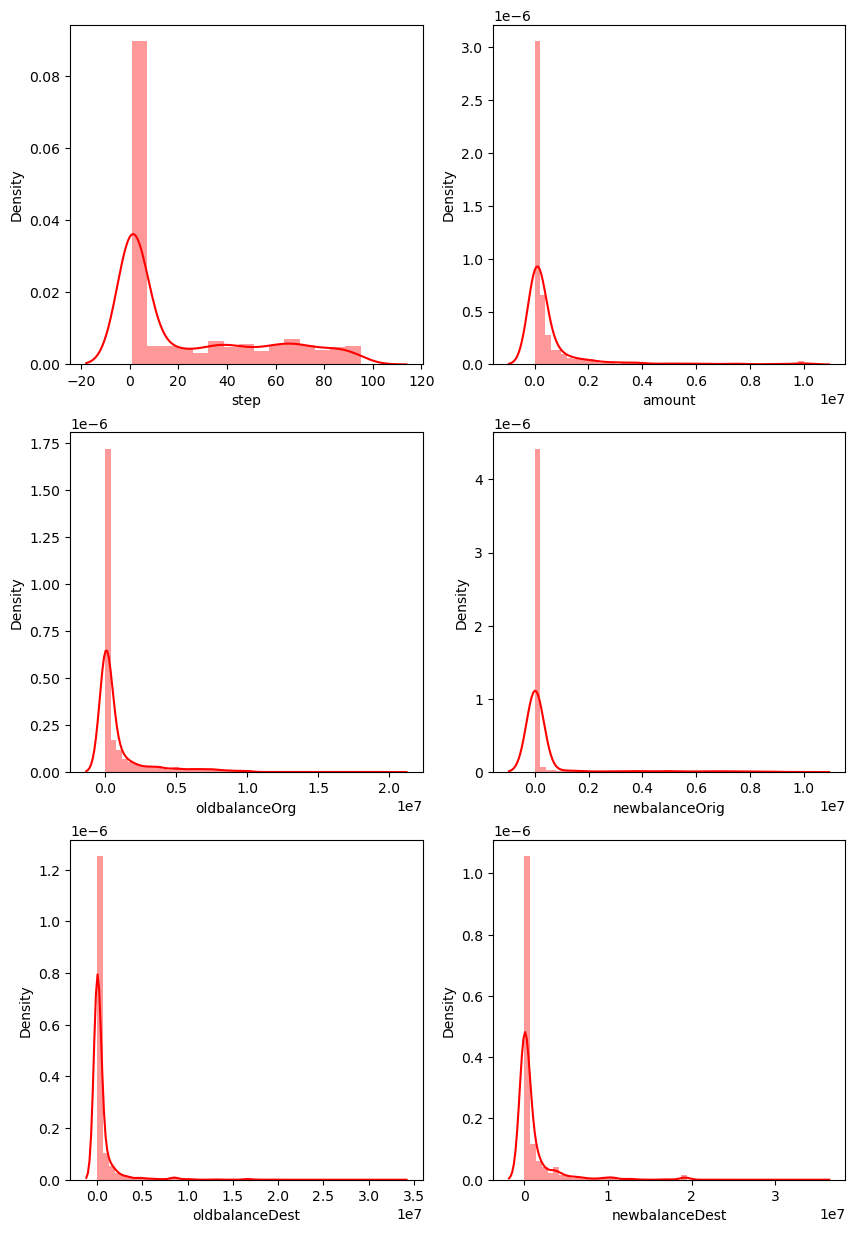

In [314]:
# Let's check for normal distribution
f=numerical_data.columns
fig,ax=plt.subplots(3,2,figsize=(10,15))
for i,subplot in zip(f,ax.flatten()):
    sns.distplot(numerical_data[i],ax=subplot,color="r")

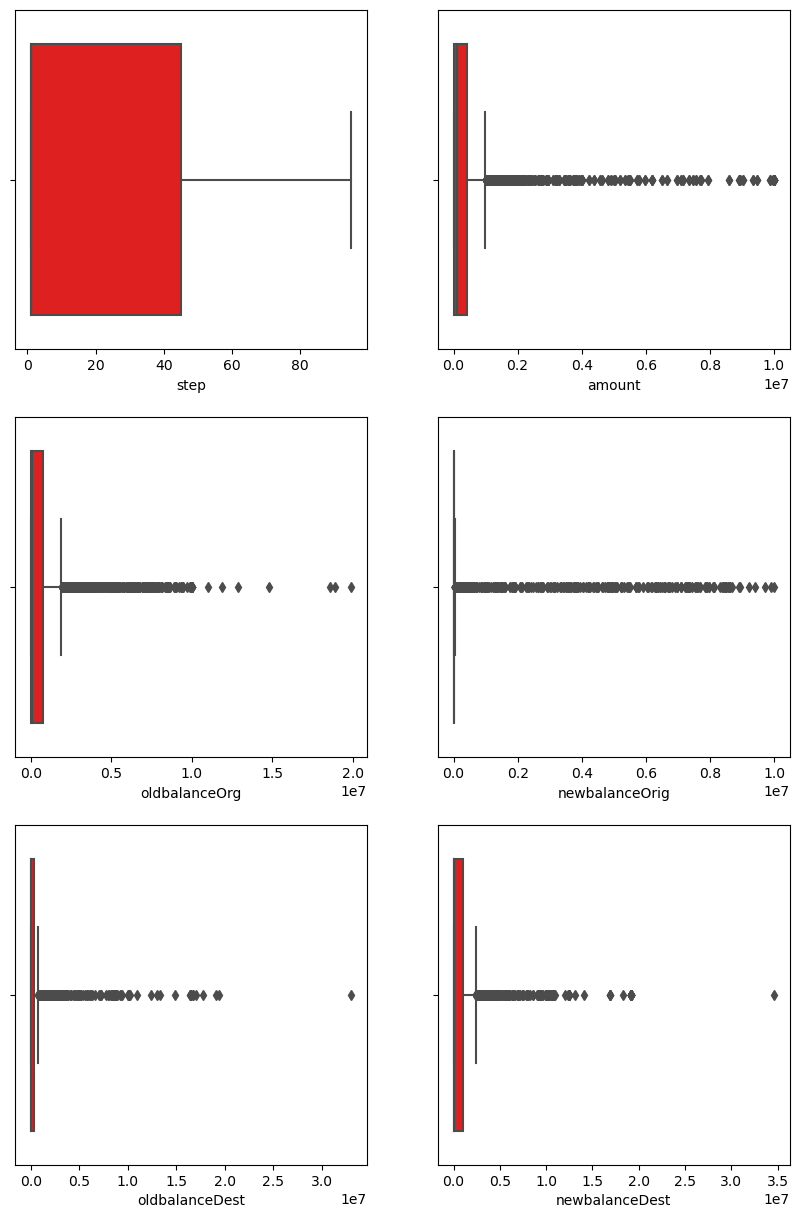

In [315]:
# Let's check for outliers
fig,ax=plt.subplots(3,2,figsize=(10,15))
for i,subplot in zip(f,ax.flatten()):
    sns.boxplot(numerical_data[i],ax=subplot,color="r")

### Now we got a clear idea of numerical data , so iam going to handle outliers 
- for handling outliers iam using variable transformation technique:

### Using Variable Yeojohnson technique i will try to solve outliers


In [316]:
from scipy import stats

In [317]:
def vt(numerical_data,var):
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1)
    plt.title("Boxplot")
    sns.boxplot(x=numerical_data[var])
    plt.subplot(1,3,2)
    plt.title("Hist")
    plt.hist(numerical_data[var])
    plt.subplot(1,3,3)
    plt.title("Prob plot")
    stats.probplot(numerical_data[var],plot=plt)

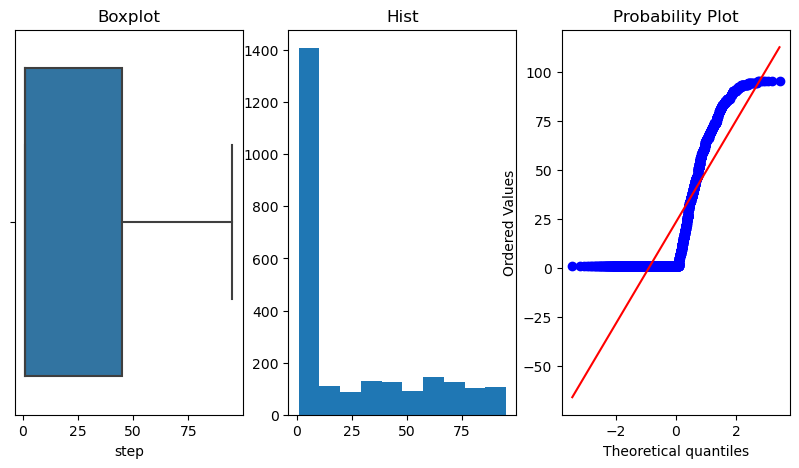

In [318]:
vt(numerical_data,"step")

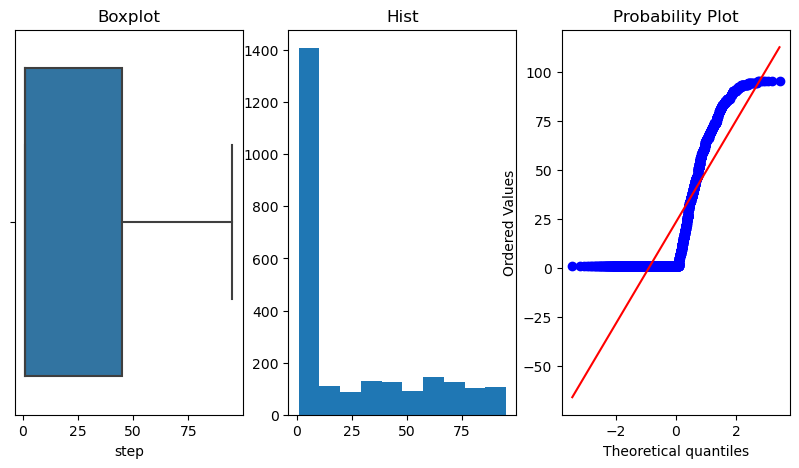

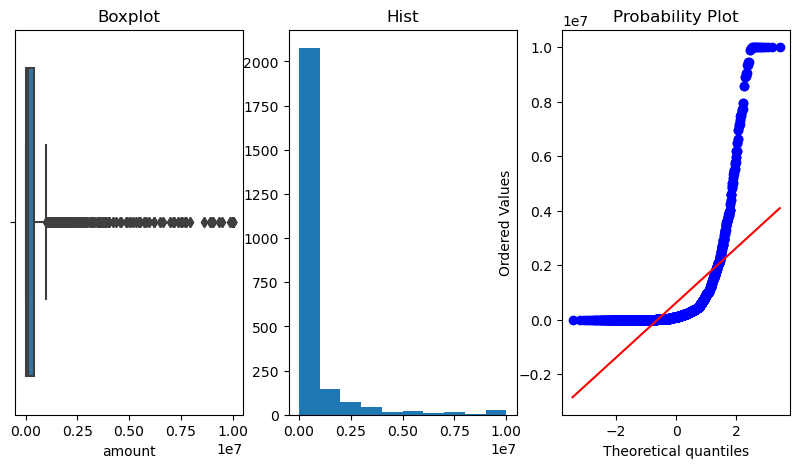

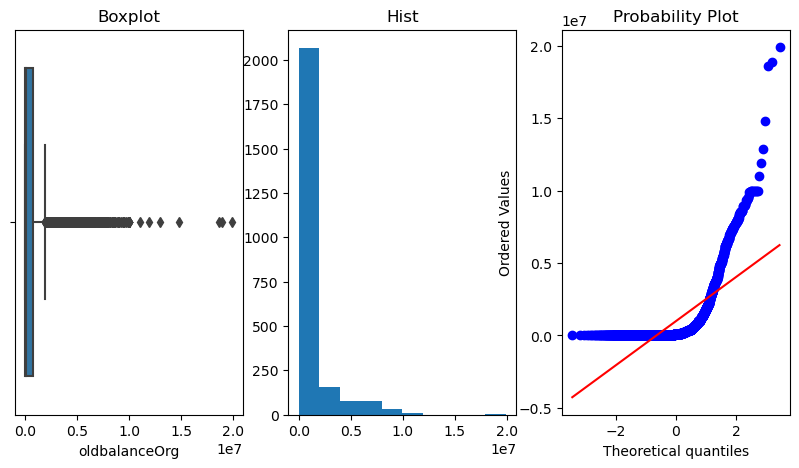

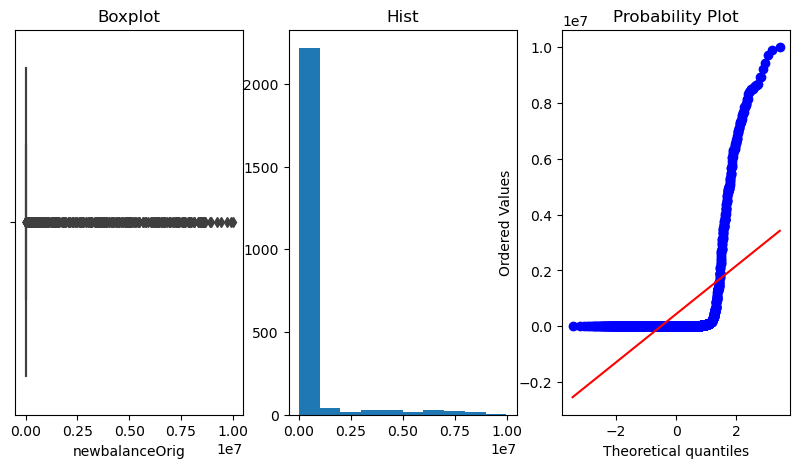

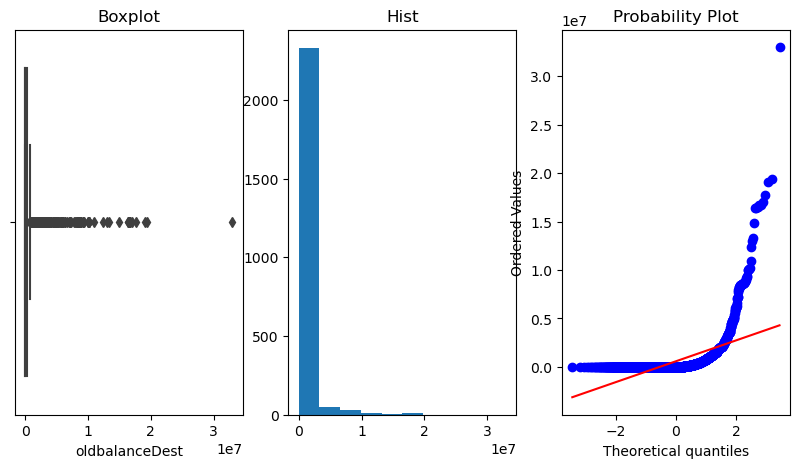

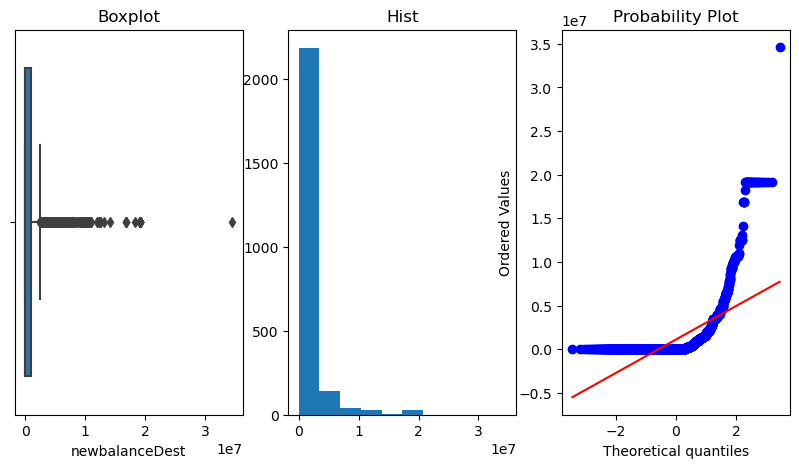

In [319]:
for i in numerical_data.columns:
    vt(numerical_data,i)

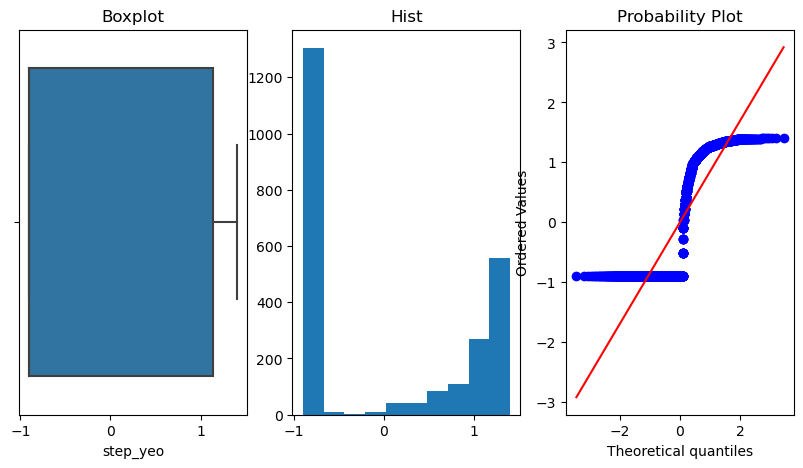

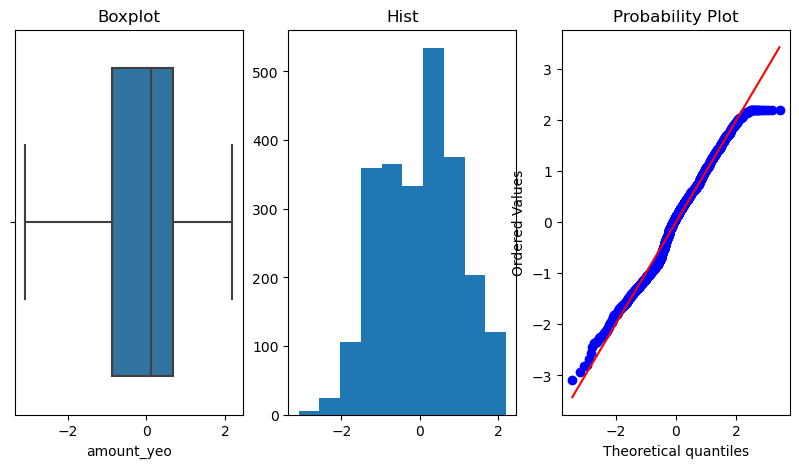

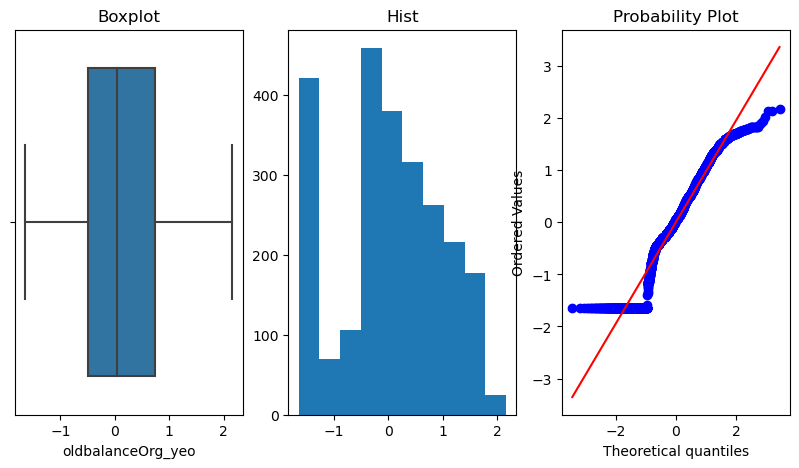

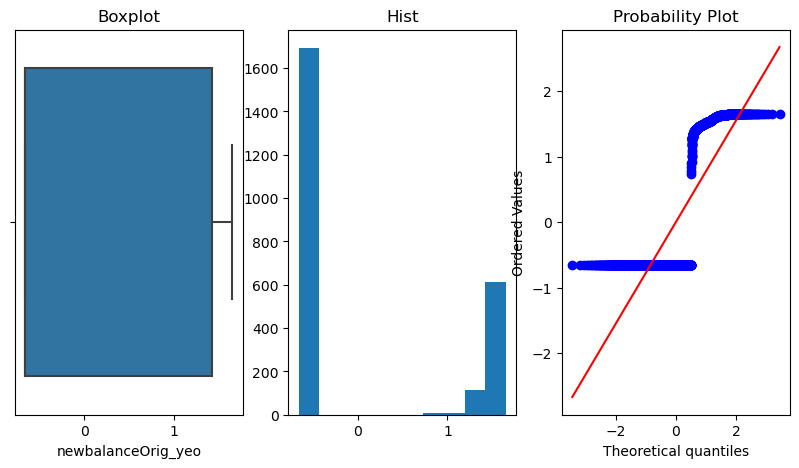

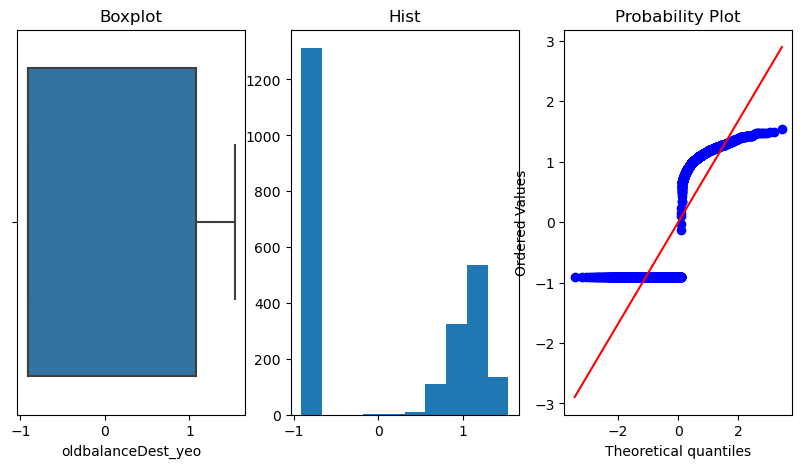

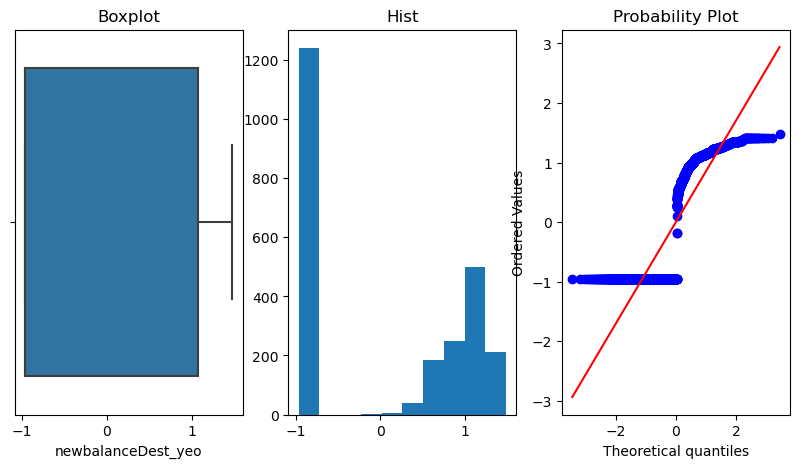

In [330]:
from sklearn.preprocessing import PowerTransformer
yeo_johnson = PowerTransformer(method='yeo-johnson')
for i in numerical_data.columns:
    ct=numerical_data[i].values.reshape(-1,1)
    numerical_data[i+"_yeo"]=yeo_johnson.fit_transform(ct)
    vt(numerical_data,i+"_yeo")

In [331]:
numerical_data.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'step_yeo', 'amount_yeo', 'oldbalanceOrg_yeo',
       'newbalanceOrig_yeo', 'oldbalanceDest_yeo', 'newbalanceDest_yeo'],
      dtype='object')

In [332]:
# now remove original columns 
numerical_data.drop(columns=['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],axis=1,inplace=True)

In [333]:
numerical_data

,step_yeo,amount_yeo,oldbalanceOrg_yeo,newbalanceOrig_yeo,oldbalanceDest_yeo,newbalanceDest_yeo
0,-0.899519,-0.832001,0.258368,1.552228,-0.912848,-0.963756
1,-0.899519,-1.434872,-0.290024,1.451895,-0.912848,-0.963756
2,-0.899519,-0.767781,-0.127804,1.476428,-0.912848,-0.963756
3,-0.899519,-0.917935,-0.061512,1.498691,-0.912848,-0.963756
4,-0.899519,-0.953255,0.280470,1.555694,-0.912848,-0.963756
...,...,...,...,...,...,...
2425,1.398083,-0.149084,-0.047927,-0.658226,0.869649,0.804700
2426,1.398083,-0.357793,-0.180042,-0.658226,-0.912848,-0.963756
2427,1.398083,-0.357793,-0.180042,-0.658226,-0.912848,0.653292
2428,1.398083,0.030040,0.069691,-0.658226,-0.912848,-0.963756


In [334]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0
3,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0
4,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0


In [335]:
categorical_data=data.select_dtypes(include="object")
categorical_data

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,PAYMENT,C2048537720,M1230701703
3,PAYMENT,C90045638,M573487274
4,PAYMENT,C154988899,M408069119
...,...,...,...
2425,CASH_OUT,C526144262,C79051264
2426,TRANSFER,C732111322,C1140210295
2427,CASH_OUT,C1000086512,C1759363094
2428,TRANSFER,C927181710,C757947873


In [336]:
# here type, nameOrig, nameDest columns are categorical data type , now let's convert them into numerical 
# let's check column by column

In [337]:
#Let's check unique values in column type

categorical_data["type"].unique()

array(['PAYMENT', 'DEBIT', 'CASH_OUT', 'TRANSFER', 'CASH_IN'],
      dtype=object)

<AxesSubplot:xlabel='type', ylabel='count'>

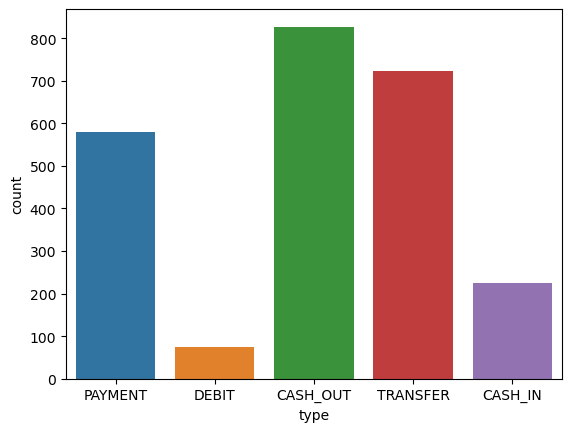

In [338]:
sns.countplot(data=categorical_data,x="type")

In [339]:
# convert type column into numerical using mean encoding
value=data.groupby(["type"])["isFraud"].mean().sort_values(ascending=True).index

In [340]:
value

Index(['CASH_IN', 'DEBIT', 'PAYMENT', 'CASH_OUT', 'TRANSFER'], dtype='object', name='type')

In [341]:
sol={j:i for i,j in enumerate(value,0)}

In [342]:
sol

{'CASH_IN': 0, 'DEBIT': 1, 'PAYMENT': 2, 'CASH_OUT': 3, 'TRANSFER': 4}

In [343]:
categorical_data["type_new"]=data["type"].map(sol)

In [344]:
categorical_data.head()

,type,nameOrig,nameDest,type_new
0,PAYMENT,C1231006815,M1979787155,2
1,PAYMENT,C1666544295,M2044282225,2
2,PAYMENT,C2048537720,M1230701703,2
3,PAYMENT,C90045638,M573487274,2
4,PAYMENT,C154988899,M408069119,2


In [345]:
# As nameOrig and nameDest not important , drop those columns and drop type column also
categorical_data.drop(columns=["nameOrig","nameDest","type"],axis=1,inplace=True)

In [346]:
categorical_data.head()

,type_new
0,2
1,2
2,2
3,2
4,2


In [347]:
len(categorical_data.columns)

1

In [348]:
df=pd.concat([numerical_data,categorical_data,data["isFraud"]],axis=1)

In [349]:
df.head()

,step_yeo,amount_yeo,oldbalanceOrg_yeo,newbalanceOrig_yeo,oldbalanceDest_yeo,newbalanceDest_yeo,type_new,isFraud
0,-0.899519,-0.832001,0.258368,1.552228,-0.912848,-0.963756,2,0
1,-0.899519,-1.434872,-0.290024,1.451895,-0.912848,-0.963756,2,0
2,-0.899519,-0.767781,-0.127804,1.476428,-0.912848,-0.963756,2,0
3,-0.899519,-0.917935,-0.061512,1.498691,-0.912848,-0.963756,2,0
4,-0.899519,-0.953255,0.280470,1.555694,-0.912848,-0.963756,2,0


<AxesSubplot:xlabel='isFraud', ylabel='count'>

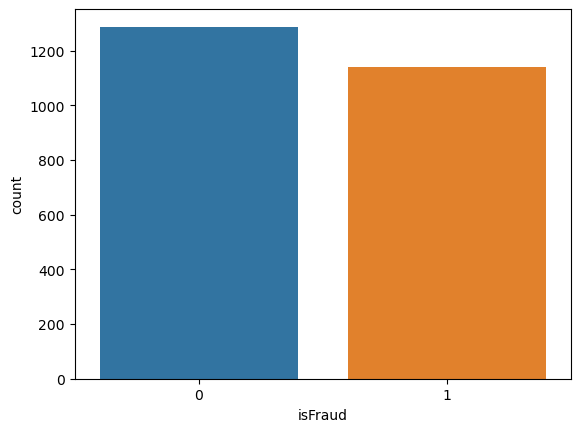

In [350]:
#isFraud:
sns.countplot(data=df,x='isFraud')

<AxesSubplot:>

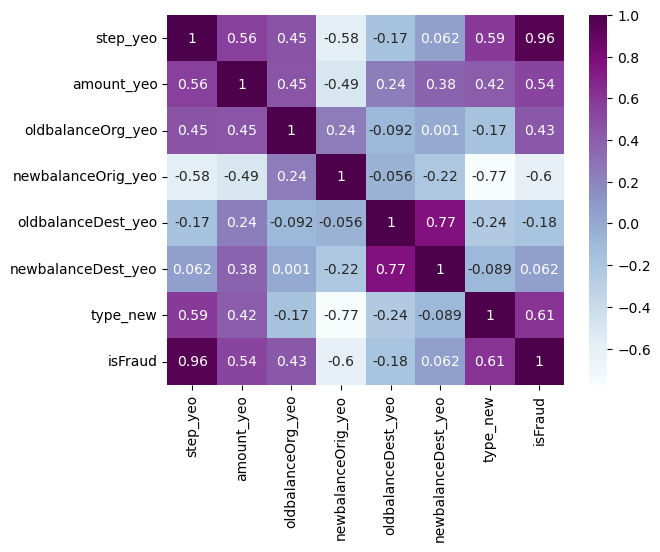

In [351]:
sns.heatmap(df.corr(method="pearson"),cmap="BuPu",annot=True)

# Feature Selection

In [352]:
from sklearn.feature_selection import VarianceThreshold

In [353]:
var=VarianceThreshold(threshold=0.0)
independent=df.drop(columns=["isFraud"],axis=1)

In [354]:
independent

,step_yeo,amount_yeo,oldbalanceOrg_yeo,newbalanceOrig_yeo,oldbalanceDest_yeo,newbalanceDest_yeo,type_new
0,-0.899519,-0.832001,0.258368,1.552228,-0.912848,-0.963756,2
1,-0.899519,-1.434872,-0.290024,1.451895,-0.912848,-0.963756,2
2,-0.899519,-0.767781,-0.127804,1.476428,-0.912848,-0.963756,2
3,-0.899519,-0.917935,-0.061512,1.498691,-0.912848,-0.963756,2
4,-0.899519,-0.953255,0.280470,1.555694,-0.912848,-0.963756,2
...,...,...,...,...,...,...,...
2425,1.398083,-0.149084,-0.047927,-0.658226,0.869649,0.804700,3
2426,1.398083,-0.357793,-0.180042,-0.658226,-0.912848,-0.963756,4
2427,1.398083,-0.357793,-0.180042,-0.658226,-0.912848,0.653292,3
2428,1.398083,0.030040,0.069691,-0.658226,-0.912848,-0.963756,4


In [355]:
var.fit(independent)

VarianceThreshold()

In [356]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [357]:
# all are important , now let's apply quasi constatnt removal technique
var=VarianceThreshold(threshold=0.1)

In [358]:
var.fit(independent)

VarianceThreshold(threshold=0.1)

In [359]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [360]:
# here also all are important , let's apply duplicate removal technique
from feature_engine.selection import DropDuplicateFeatures
duplicates=DropDuplicateFeatures()

In [361]:
duplicates.fit(independent)

DropDuplicateFeatures()

In [362]:
duplicates.features_to_drop_

set()

In [363]:
# theres is no duplicate columns to drop , let's apply correlation
from feature_engine.selection import DropCorrelatedFeatures

In [364]:
correlated=DropCorrelatedFeatures()

In [365]:
correlated.fit(independent)

DropCorrelatedFeatures()

In [366]:
correlated.features_to_drop_

set()

In [367]:
independent

,step_yeo,amount_yeo,oldbalanceOrg_yeo,newbalanceOrig_yeo,oldbalanceDest_yeo,newbalanceDest_yeo,type_new
0,-0.899519,-0.832001,0.258368,1.552228,-0.912848,-0.963756,2
1,-0.899519,-1.434872,-0.290024,1.451895,-0.912848,-0.963756,2
2,-0.899519,-0.767781,-0.127804,1.476428,-0.912848,-0.963756,2
3,-0.899519,-0.917935,-0.061512,1.498691,-0.912848,-0.963756,2
4,-0.899519,-0.953255,0.280470,1.555694,-0.912848,-0.963756,2
...,...,...,...,...,...,...,...
2425,1.398083,-0.149084,-0.047927,-0.658226,0.869649,0.804700,3
2426,1.398083,-0.357793,-0.180042,-0.658226,-0.912848,-0.963756,4
2427,1.398083,-0.357793,-0.180042,-0.658226,-0.912848,0.653292,3
2428,1.398083,0.030040,0.069691,-0.658226,-0.912848,-0.963756,4


In [368]:
# now let's check whether the data is balanced or not 
df["isFraud"].value_counts()

0    1288
1    1142
Name: isFraud, dtype: int64

In [369]:
# here the data is almost balanced , hence no need to balance it

# Data Splitting

In [370]:
x=independent
y=df["isFraud"]

In [371]:
x.head()

,step_yeo,amount_yeo,oldbalanceOrg_yeo,newbalanceOrig_yeo,oldbalanceDest_yeo,newbalanceDest_yeo,type_new
0,-0.899519,-0.832001,0.258368,1.552228,-0.912848,-0.963756,2
1,-0.899519,-1.434872,-0.290024,1.451895,-0.912848,-0.963756,2
2,-0.899519,-0.767781,-0.127804,1.476428,-0.912848,-0.963756,2
3,-0.899519,-0.917935,-0.061512,1.498691,-0.912848,-0.963756,2
4,-0.899519,-0.953255,0.280470,1.555694,-0.912848,-0.963756,2


In [372]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [373]:
from sklearn.model_selection import train_test_split

In [374]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [375]:
len(X_train),len(y_train)

(1944, 1944)

In [376]:
len(X_test),len(y_test)

(486, 486)

In [377]:
y_test.head()

2266    1
1136    0
841     0
1627    1
2417    1
Name: isFraud, dtype: int64

In [378]:
y_test.value_counts()

0    265
1    221
Name: isFraud, dtype: int64

In [379]:
y_train.value_counts()

0    1023
1     921
Name: isFraud, dtype: int64

# Model Building
- KNN
- Logistic Regression
- Decision Tree
- Random Forest

In [380]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,confusion_matrix

In [381]:
def lr(X_train,X_test,y_train,y_test):
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_train_pred=lr.predict(X_train)
    train_accuracy=accuracy_score(y_train,y_train_pred)
    print("Training_Accuracy:",train_accuracy)
    y_test_pred=lr.predict(X_test)
    test_accuracy=accuracy_score(y_test,y_test_pred)
    print("Testing_Accuracy:",test_accuracy)
    print("Classification Report:")
    print(classification_report(y_test,y_test_pred))
    print("Confusion Matrix:")
    conf=confusion_matrix(y_test,y_test_pred)
    print(conf)

In [382]:
def knn(X_train,X_test,y_train,y_test):
    knn=KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train,y_train)
    y_train_pred=knn.predict(X_train)
    train_accuracy=accuracy_score(y_train,y_train_pred)
    print("Training_Accuracy:",train_accuracy)
    y_test_pred=knn.predict(X_test)
    test_accuracy=accuracy_score(y_test,y_test_pred)
    print("Testing_Accuracy:",test_accuracy)
    print("Classification Report:")
    print(classification_report(y_test,y_test_pred))
    print("Confusion Matrix:")
    conf=confusion_matrix(y_test,y_test_pred)
    print(conf)

In [383]:
def dt(X_train,X_test,y_train,y_test):
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    y_train_pred=dt.predict(X_train)
    train_accuracy=accuracy_score(y_train,y_train_pred)
    print("Training_Accuracy:",train_accuracy)
    y_test_pred=dt.predict(X_test)
    test_accuracy=accuracy_score(y_test,y_test_pred)
    print("Testing_Accuracy:",test_accuracy)
    print("Classification Report:")
    print(classification_report(y_test,y_test_pred))
    print("Confusion Matrix:")
    conf=confusion_matrix(y_test,y_test_pred)
    print(conf)

In [384]:
def rf(X_train,X_test,y_train,y_test):
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    y_train_pred=rf.predict(X_train)
    train_accuracy=accuracy_score(y_train,y_train_pred)
    print("Training_Accuracy:",train_accuracy)
    y_test_pred=rf.predict(X_test)
    test_accuracy=accuracy_score(y_test,y_test_pred)
    print("Testing_Accuracy:",test_accuracy)
    print("Classification Report:")
    print(classification_report(y_test,y_test_pred))
    print("Confusion Matrix:")
    conf=confusion_matrix(y_test,y_test_pred)
    print(conf)

In [385]:
# calling
print("---------------KNN---------------------")
knn(X_train,X_test,y_train,y_test)
print("---------------LR---------------------")
lr(X_train,X_test,y_train,y_test)
print("---------------DT---------------------")
dt(X_train,X_test,y_train,y_test)
print("---------------RF---------------------")
rf(X_train,X_test,y_train,y_test)

---------------KNN---------------------
Training_Accuracy: 0.9984567901234568
Testing_Accuracy: 0.9958847736625515
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       1.00      1.00      1.00       221

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486

Confusion Matrix:
[[264   1]
 [  1 220]]
---------------LR---------------------
Training_Accuracy: 0.9948559670781894
Testing_Accuracy: 0.9958847736625515
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       1.00      1.00      1.00       221

    accuracy                           1.00       486
   macro avg       1.00      1.00      1.00       486
weighted avg       1.00      1.00      1.00       486

Confusion Matrix:
[[264   1]
 

In [386]:
# here all having best accuracy scores, let's select best among them using auc_roc curves

In [387]:
from sklearn.metrics import roc_curve

In [388]:
#model training
r1=KNeighborsClassifier(n_neighbors=3)
r2=LogisticRegression()
r3=DecisionTreeClassifier()
r4=RandomForestClassifier()

#model fitting
r1.fit(X_train,y_train)
r2.fit(X_train,y_train)
r3.fit(X_train,y_train)
r4.fit(X_train,y_train)

#model testing
y_k=r1.predict_proba(X_test)[:,1]
y_l=r2.predict_proba(X_test)[:,1]
y_d=r3.predict_proba(X_test)[:,1]
y_r=r4.predict_proba(X_test)[:,1]

#finding fpr and tpr for all models
fprk,tprk,threshold=roc_curve(y_test,y_k)
fprl,tprl,threshold=roc_curve(y_test,y_l)
fprd,tprd,threshold=roc_curve(y_test,y_d)
fprr,tprr,threshold=roc_curve(y_test,y_r)


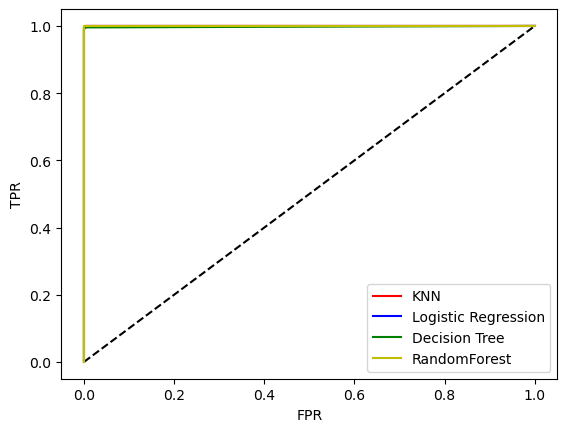

In [389]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fprk,tprk,label="KNN",color="r")
plt.plot(fprl,tprl,label="Logistic Regression",color="b")
plt.plot(fprd,tprd,label="Decision Tree",color="g")
plt.plot(fprr,tprr,label="RandomForest",color="y")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=0)
plt.show()

In [390]:
# here almost all models performs well , but random forest seems to be good , so we can take best model as random forest

In [391]:
y_test_pred=r4.predict(X_test)
accuracy_score(y_test,y_test_pred)

1.0

In [392]:
y_test_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,

In [393]:
X_test

,step_yeo,amount_yeo,oldbalanceOrg_yeo,newbalanceOrig_yeo,oldbalanceDest_yeo,newbalanceDest_yeo,type_new
2266,1.346247,1.401939,1.106478,-0.658226,-0.912848,-0.963756,4
1136,-0.899519,-0.298848,-1.646846,-0.658226,1.049055,1.027511,4
841,-0.899519,0.327161,-1.646846,-0.658226,1.235719,1.166833,3
1627,0.995807,1.412073,1.115068,-0.658226,-0.912848,-0.963756,4
2417,1.394713,1.491323,1.182732,-0.658226,1.367814,1.312746,3
...,...,...,...,...,...,...,...
2416,1.394713,1.491323,1.182732,-0.658226,-0.912848,-0.963756,4
1085,-0.899519,-0.970885,-0.597670,-0.658226,-0.912848,-0.963756,2
2385,1.387832,1.259990,0.987636,-0.658226,1.337448,1.271203,3
1840,1.151343,0.457805,0.366750,-0.658226,1.117108,1.033436,3


In [394]:
data.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0


In [395]:
data["oldbalanceOrg"].unique()

array([170136.  ,  21249.  ,  41554.  , ...,  56745.14,  33676.59,
        87999.25])

In [396]:
from sklearn.preprocessing import PowerTransformer

In [418]:
sample=[1,100,1036,1096,0.0,0.0]
new_sample_df = pd.DataFrame([new_sample], columns=numerical_data.columns)

In [419]:
for column in new_sample_df.columns:
    ct=new_sample_df[column].values.reshape(-1,1)
    new_sample_df[column]=yeo_johnson.transform(ct)

In [420]:
new_sample_df

,step_yeo,amount_yeo,oldbalanceOrg_yeo,newbalanceOrig_yeo,oldbalanceDest_yeo,newbalanceDest_yeo
0,-0.869778,-0.570679,-0.533271,-0.533954,-0.963756,-0.963756


In [421]:
Ttype=4
Type=np.array(Ttype)

In [422]:
type_df=pd.DataFrame([Ttype],columns=categorical_data.columns)

In [423]:
type_df

,type_new
0,4


In [424]:
final=pd.concat([new_sample_df,type_df],axis=1)

In [425]:
pred=r4.predict(final)

In [426]:
pred[0]

1

In [427]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0
3,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0
4,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0


In [452]:
def predict_label(inp):
    sample=inp[:-1]
    cat=inp[-1]
    new_sample_df = pd.DataFrame([new_sample], columns=numerical_data.columns)
    for column in new_sample_df.columns:
        ct=new_sample_df[column].values.reshape(-1,1)
        new_sample_df[column]=yeo_johnson.transform(ct)
    cat=np.array(cat)
    cat_df=pd.DataFrame([cat],columns=categorical_data.columns)
    final=pd.concat([new_sample_df,cat_df],axis=1)
    if r4.predict(final)==0:
        print("Transaction is Not Fraud")
    else:
        print("Transaction is Fraud")

In [453]:
predict_label([1,22100,122036,102296,10.0,10.0,3])

Transaction is Fraud


In [454]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0
3,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0
4,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0


In [455]:
independent.head(1)

,step_yeo,amount_yeo,oldbalanceOrg_yeo,newbalanceOrig_yeo,oldbalanceDest_yeo,newbalanceDest_yeo,type_new
0,-0.899519,-0.832001,0.258368,1.552228,-0.912848,-0.963756,2


In [456]:
data.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [457]:
predict_label([1,11668.14,41554,29885.86,0,0,2])

Transaction is Not Fraud


In [458]:
predict_label([1,11668.14,41554,29885.86,0,0,4])

Transaction is Fraud


In [460]:
step=int(input("Enter unit of time where 1 step equals 1 hour:"))
amount=int(input("Enter the amount of the transaction:"))
oldbalanceOrg=int(input("Enter balance of sender before the transaction:"))
newbalanceOrg=int(input("Enter balance of sender after the transaction:"))
oldbalanceDest=int(input("Enter balance of recepient before the transaction:"))
newbalanceDest=int(input("Enter balance of recepient after the transaction:"))
t_type=int(input("Enter type of transaction: 'CASH_IN': 0, 'DEBIT': 1, 'PAYMENT': 2, 'CASH_OUT': 3, 'TRANSFER': 4 "))
inp=[step,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,t_type]
print("------------------------------")
predict_label(inp)

Enter unit of time where 1 step equals 1 hour:1
Enter the amount of the transaction:73732
Enter balance of sender before the transaction:372964
Enter balance of sender after the transaction:203909
Enter balance of recepient before the transaction:202303
Enter balance of recepient after the transaction:303903
Enter type of transaction: 'CASH_IN': 0, 'DEBIT': 1, 'PAYMENT': 2, 'CASH_OUT': 3, 'TRANSFER': 4 3
------------------------------
Transaction is Fraud
